# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [49]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

**Examine the data using the `head` function.**

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.dropna()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


***How many rows and columns are in our data?***

In [5]:
# Your code here:
print ("1751 rows")

1751 rows


***To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.***

In [6]:
# Your code here:
timestamp = pd.date_range("1/1/2018 00:00:00","1/1/2018 00:29:10",periods = 1751)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:

dates = pd.date_range("1/1/2018 00:00:00","1/1/2018 00:29:10",periods = 1751)
freq = pd.infer_freq(dates)
print(freq)

S


In [8]:
dates.freq = freq

In [18]:
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [25]:
sensor.index = dates

In [27]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRateX,rotationRateY,rotationRate.z,userAccelerationX,userAccelerationY,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


***Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.***

![time series decomposition](../images/tsa_decompose.png)

In [12]:
import statsmodels.api
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Your code here:

sensor.rename(columns={'userAcceleration.x':'userAccelerationX',
                       'rotationRate.x':'rotationRateX',
                       'userAcceleration.y':'userAccelerationY',
                       'rotationRate.y':'rotationRateY'},
               inplace=True)
sensor.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRateX', 'rotationRateY',
       'rotationRate.z', 'userAccelerationX', 'userAccelerationY',
       'userAcceleration.z'],
      dtype='object')

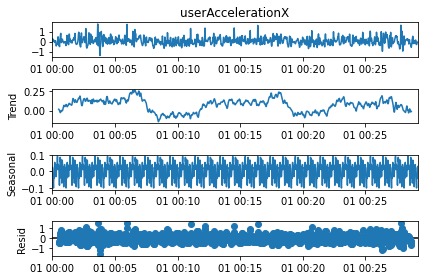

In [30]:
dec_sea_uAx = seasonal_decompose(sensor['userAccelerationX'], model="additive", period=60)
dec_sea_uAx.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

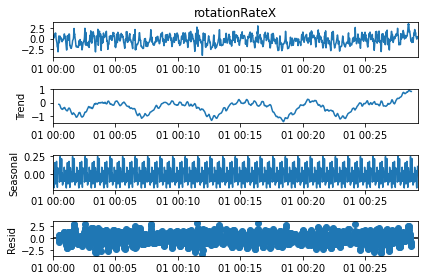

In [32]:
dec_sea_rRx = seasonal_decompose(sensor['rotationRateX'], model="additive", period=60)
dec_sea_rRx.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'y(t+1)')

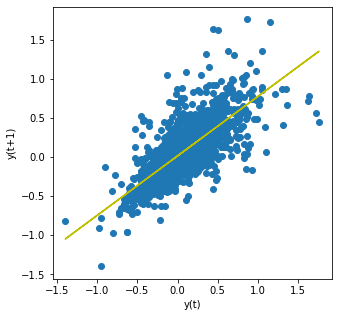

In [45]:
# Your code here:


lr = LinearRegression()
data_t = sensor["userAccelerationX"][:-1]
data_t_plus_1 = sensor["userAccelerationX"][1:]
lr.fit(data_t.to_frame(),data_t_plus_1)
y_pred = lr.predict(data_t.to_frame())

plt.figure(figsize=(5,5))
plt.scatter(x = data_t, y = data_t_plus_1)
plt.plot(data_t,y_pred, c = "y")
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")

***Create a lag plot for `rotationRate.x`***

Text(0, 0.5, 'y_2(t+1)')

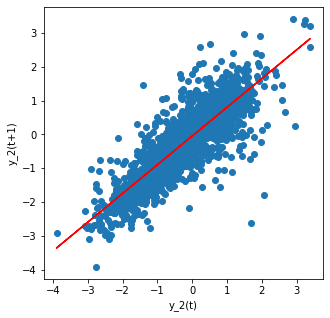

In [47]:
lr_2 = LinearRegression()
data_t_2 = sensor["rotationRateX"][:-1]
data_t_plus_1_2 = sensor["rotationRateX"][1:]
lr_2.fit(data_t_2.to_frame(), data_t_plus_1_2)
y_pred_2 = lr_2.predict(data_t_2.to_frame())

plt.figure(figsize = (5,5))
plt.scatter(x = data_t_2, y = data_t_plus_1_2)
plt.plot(data_t_2,y_pred_2, c = "r")
plt.xlabel("y_2(t)")
plt.ylabel("y_2(t+1)")

What are your conclusions from both visualizations?

In [ ]:
# Your conclusions here:



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [51]:
# Your code here:
res_acceleration = adfuller(sensor["userAccelerationX"])
res_acceleration

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [53]:
# Your conclusions here:
res_rotation = adfuller(sensor["rotationRateX"])
res_rotation

(-5.2698606250864195,
 6.320230335912249e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.604971998195)

What are your conclusions from this test?

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

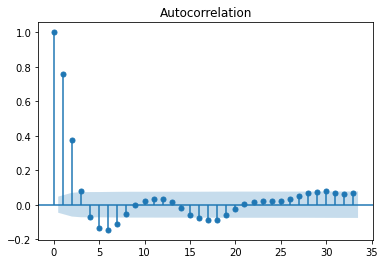

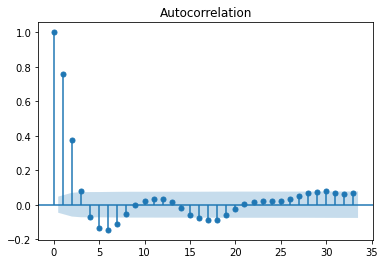

In [38]:
# Your code here:
plot_acf(sensor["userAccelerationX"])

In [ ]:
# Your code here:



To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:

